In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier

In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\train.csv")

In [3]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['engagement']=l.fit_transform(df['engagement'])

In [4]:
df

,id,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate,engagement
0,1,9,7.753995,16310,75.583936,0.553664,0.034049,2.997753,0.000000,1
1,2,6,8.305269,15410,86.870523,0.584498,0.018763,2.635789,0.000000,0
2,3,3,7.965583,15680,81.915968,0.605685,0.030720,2.538095,0.000000,0
3,4,9,8.142877,15610,80.148937,0.593664,0.016873,2.259055,0.000000,0
4,5,9,8.161250,14920,76.907549,0.581637,0.023412,2.420000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
9234,9235,7,7.820262,14170,82.302473,0.587838,0.027449,2.120000,0.250322,0
9235,9236,6,8.781639,14410,83.361440,0.588235,0.012465,2.251447,0.000000,0
9236,9237,5,7.643789,16240,82.425897,0.611600,0.034213,2.728182,0.000000,0
9237,9238,6,7.985593,14500,87.565381,0.630815,0.020167,2.529861,0.300094,0


In [5]:
X=df.drop(columns=['id','title_word_count','engagement'])

In [6]:
y=df['engagement']

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc=StandardScaler()

In [9]:
X=sc.fit_transform(X)

In [10]:
nn=MLPClassifier()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=4)

In [13]:
model=nn.fit(X_train,y_train)

G:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
y_pred=model.predict(X_test)

In [25]:
from sklearn.metrics import roc_curve,roc_auc_score

In [26]:
roc=roc_auc_score(y_test,y_pred)

In [27]:
roc

0.7239876021088001

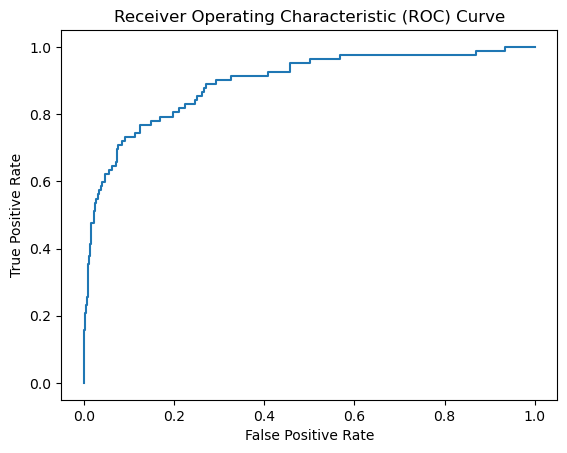

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1].reshape(-1,1))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()